In [47]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve
from scipy.integrate import odeint

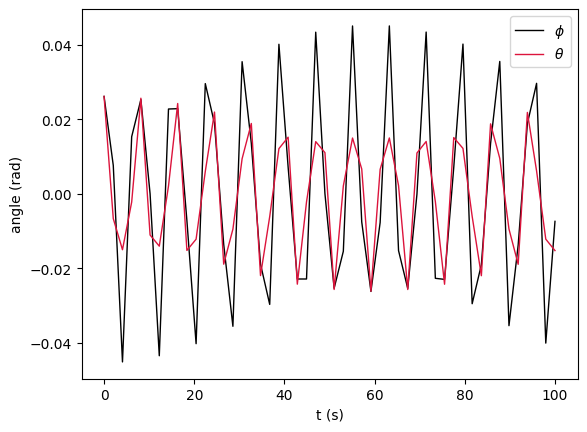

In [53]:
def model(x, t, w):
    
    phi, theta, v_phi, v_theta = x
    m, M = w
    f1 = np.cos(theta-phi)
    f2 = m/(M+m)*np.cos(theta-phi)
    g1 = (v_theta**2)*np.sin(theta-phi) - np.sin(phi)
    g2 = (v_phi**2)*(-m/(M+m)*np.sin(theta-phi)) - np.sin(theta)
    a_phi = (g1-f1*g2) / (1-f1*f2)
    a_theta = (-f2*g1+g2) / (1-f1*f2)
    return [v_phi, v_theta, a_phi, a_theta]

# initial conditions
m = 1 # kg
M = 2 # kg
phi0 = np.pi/120
theta0 = np.pi/120
v_phi0 = 0.0
v_theta0 = 0
t = np.linspace(0,100)

phi, theta, v_phi, v_theta = odeint(model, [phi0, theta0, v_phi0, v_theta0], t, args=([m, M],)).T

plt.plot(t, phi, c='black', lw=1)
plt.plot(t, theta, c='crimson', lw=1)
plt.xlabel('t (s)')
plt.ylabel('angle (rad)')
plt.legend((r'$\phi$', r'$\theta$'))
plt.show()

In [46]:
print(phi)

[ 0.26179939 -0.29969398  0.310717   -0.1828955   0.02782672  0.02478274
 -0.07588482  0.22173652 -0.33440141  0.30883949 -0.25858354  0.28431524
 -0.28092474  0.13864375  0.02289525 -0.07345267  0.11986057 -0.25464485
  0.35188875 -0.31171196  0.24894012 -0.26276812  0.24523479 -0.08985588
 -0.07453834  0.11955845 -0.15873899  0.28134987 -0.36315215  0.30827921
 -0.23288837  0.23517719 -0.20406212  0.03782749  0.12524129 -0.16174315
  0.19187154 -0.30173784  0.3681893  -0.2985103   0.21048065 -0.20178065
  0.15812661  0.01575648 -0.17328557  0.19903054 -0.21888512  0.31578185
 -0.36700129  0.28238087]


[1, 2]

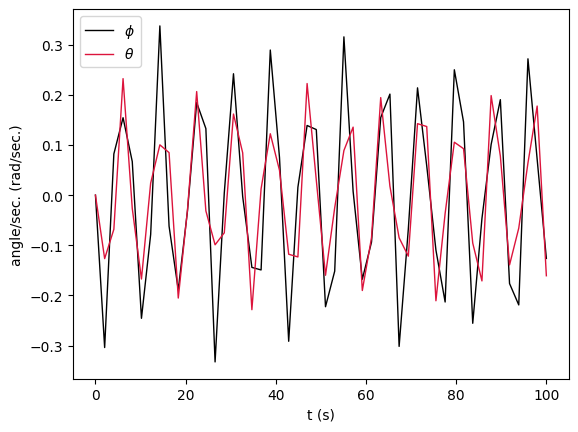

In [49]:
plt.plot(t, v_phi, c='black', lw=1)
plt.plot(t, v_theta, c='crimson', lw=1)
plt.xlabel('t (s)')
plt.ylabel('angle/sec. (rad/sec.)')
plt.legend((r'$\phi$', r'$\theta$'))
plt.show()

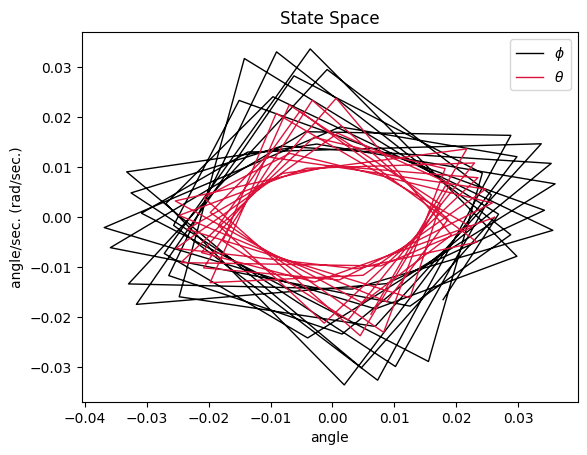

In [52]:
plt.plot(phi, v_phi, c='black', lw=1)
plt.plot(theta, v_theta, c='crimson', lw=1)
plt.xlabel('angle')
plt.title('State Space')
plt.ylabel('angle/sec. (rad/sec.)')
plt.legend((r'$\phi$', r'$\theta$'))
plt.show()